# New Section

## **Update log**

## **Module Installation**

In [ ]:
!pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.4 MB/s eta 0:00:00


## **Data Loading**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio

las = lasio.read('gorgonichthys_1_wire_public_2010_sdb.las')

df = las.df()[(las['DEPTH'] >= 3911) & (las['DEPTH'] <= 4218)]
df1 = pd.read_excel('Core_data.xlsx')


# df = df[(df['DEPT'] >= 3911) & (df['DEPT'] <= 4218)]
df1 = df1[(df1['Top depth (m)'] >= 3911) & (df1['Top depth (m)'] <= 4218)]
df = df.reset_index(drop=True)

FileNotFoundError: ignored

In [ ]:
df.describe()

In [ ]:
df1.describe()

## **Calculations**

In [ ]:
'''(Vshc) calculation'''
p05=df.GR.quantile(0.05)
p95=df.GR.quantile(0.95)
Igr=(df['GR']-p05)/(p95-p05)    # gamma ray index
Vshc = 0.083*(2**(3.7*Igr)-1)   # Vshc for young tertiary rocks


In [ ]:
'''Density porosity(DPHI) calculation'''
P_s=2.65    # sandstone density
P_sh=2.7    # shale density
P_fl=1       #fluid density
DPHI=(P_s-df['RHOB'])/(P_s-P_fl)

In [ ]:
'''Neutron porosity(NPHI) correction'''
NPHI=df['NEUT']-0.04       # Sandstone correction factor

In [ ]:
'''Total Porosity calculation'''
Total_Porosity1=((df['NEUT']**2+DPHI**2)/2)**0.5   #for gas bearing formations
Total_Porosity2=(df['NEUT']+DPHI)/2                #for oil & water bearing formations

In [ ]:
pf=1.1
pm=2.71
phi=(pm-df["RHOB"])/(pm-pf)

In [ ]:
'''Total_Porosity correction'''
# for gas regions by considering rms of NPHI and DPHI ,else the average only
Total_Porosity=[]
DEPT=[]
for i in range(len(df.index)):
    if ((df['GR'][i] <= 90) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['GR'][i] <= 90)):
        Total_Porosity.append(((NPHI[i]**2+DPHI[i]**2)/2)**0.5 )
        DEPT.append(1)
    else:
        Total_Porosity.append((NPHI[i]+DPHI[i])/2)
        DEPT.append(0)
df['TPHI']=Total_Porosity
df['TPHI']*=100

# **Plots**

In [ ]:
# Plots
fig,axes=plt.subplots(figsize=(15,15))

ax1=plt.subplot2grid((1,6) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,6) , (0,1) ,rowspan=1 , colspan=1)
# ax11=ax1.twiny()
ax3=plt.subplot2grid((1,6) , (0,2) ,rowspan=1 , colspan=1)
ax4=plt.subplot2grid((1,6) , (0,3) ,rowspan=1, colspan=1)
ax41=ax4.twiny()
ax5=plt.subplot2grid((1,6) , (0,4) ,rowspan=1 , colspan=1)
ax51=ax5.twiny()
ax52=ax5.twiny()
ax6=plt.subplot2grid((1,6) , (0,5) ,rowspan=1 , colspan=1)

#set up indvidual log tracks/ subplots

ax1.plot(df['CALI'], df.index, color='black', lw=1.5)
ax1.plot(df['BS'], df.index, color='r', lw=1.5)
ax1.fill_betweenx(df.index,df['BS'] ,df['CALI'] , where=(df['CALI'] >= df['BS']), color='brown', alpha=0.5)
ax1.spines['top'].set_position(("axes", 1.0))
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Calliper')
ax1.invert_yaxis()  # Invert the y-axis
ax1.xaxis.set_label_position('top')
ax1.grid()

ax2.plot(df['GR'], df.index, color='g', lw=1.5)
ax2.invert_yaxis()  # Invert the y-axis
ax2.spines['top'].set_edgecolor('g')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Gamma Ray')
ax2.axvline(p05, color='firebrick', label='p05')
ax2.axvline(p95, color='indianred', label='p95')
ax2.xaxis.set_label_position('top')
ax2.grid()


ax3.plot(Vshc,df.index, color='teal', lw=1.5)
ax3.invert_yaxis()
ax3.spines['top'].set_edgecolor('teal')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Vshc')
ax3.xaxis.set_label_position('top')
ax3.grid()


ax4.plot(df["RHOB"], df.index, color='brown', lw=1.5)
ax4.invert_yaxis()
ax4.spines['top'].set_edgecolor('brown')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Density P')
ax4.xaxis.set_label_position('top')
ax4.grid()

ax41.plot(NPHI,df.index, color='mediumslateblue', lw=1.5)
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.04))
ax41.set_xlabel('Neutron Porosity')
ax41.invert_xaxis()
ax41.xaxis.set_label_position('top')
ax41.grid()

ax51.plot(np.log(df['RESS']),df.index, color='magenta', lw=1.5)
ax51.invert_yaxis()
ax51.spines['top'].set_edgecolor('magenta')
ax51.spines['top'].set_position(("axes", 1.0))
ax51.set_xlabel('Shallow Resistivity')
ax51.xaxis.set_label_position('top')

ax52.plot(np.log(df['RESD']),df.index, color='indigo', lw=1.5)
ax52.invert_yaxis()
ax52.spines['top'].set_edgecolor('indigo')
ax52.spines['top'].set_position(("axes", 1.04))
ax52.set_xlabel('Deep resistivity')
ax52.xaxis.set_label_position('top')
ax52.grid()

ax6.plot(df['TPHI'],df.index, color='orangered', lw=1.5)
ax6.scatter(df1['Porosity (%)'], df1['Top depth (m)'], s=1.5)

# ax6.scatter(df3['Porosity (%)'], df3['Top depth (m)'])
ax6.invert_yaxis()
ax6.spines['top'].set_edgecolor('orangered')
ax6.xaxis.set_ticks_position('top')
ax6.set_xlabel('Total porosity')
ax6.xaxis.set_label_position('top')
ax6.grid(2)
plt.tight_layout()


In [ ]:
'''Water Saturation calculation'''
a=1
m=2
n=2
Rw=0.1
Res_Flag=[]

# dff.rename(columns={0:'Total_Porosity'},inplace=True)

Sw=(a*Rw/(df['RESD']*df['TPHI']**m))**(1/n)  #Archie's Formula of Water Saturation

#set up indvidual log tracks/ subplots
y = []
for i in range(len(Sw)):
    if Sw[i] >= 1:
        y.append(1)
    else:
        y.append(Sw[i])

y = np.array(y)
plt.figure(figsize=(10,15))
#set up plot axes
ax1=plt.subplot2grid((1,2) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,2) , (0,1) ,rowspan=1 , colspan=1)

ax1.plot(y,df.index, color='b', lw=1.5)
ax1.set_ylim(df.index.min(),df.index.max())
ax1.invert_yaxis()
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Water Saturation')
ax1.xaxis.set_label_position('top')
ax1.set_xlim(0,.09)
ax1.fill_betweenx(df.index, 0, y, where=(y >= 0), color='lightblue', alpha=0.5)
ax1.grid()

ax2.plot(Vshc,df.index, color='teal', lw=1.5)
ax2.set_ylim(df.index.min(),df.index.max())
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('teal')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.fill_betweenx(df.index, 0, Vshc, where=(Vshc >= 0), color='brown', alpha=0.5)
ax2.grid()



In [ ]:
plt.figure(figsize=(3,10))
plt.scatter(df['TNPH'], df.index,s=1)
plt.scatter(df1['Porosity (%)'], df1['Top depth (m)'],s=1)

##**Installation of Necessary Modules**

In [ ]:
!pip install lasio

## **Import Necessary Modules**

In [ ]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

##**Loading Log Data (LAS file)**

In [ ]:
well_data_las = lasio.read('/content/drive/MyDrive/gorgonichthys_1_wire_public_2010_sdb.las')
well_data = well_data_las.df()[(well_data_las['DEPTH'] >= 3911) & (well_data_las['DEPTH'] <= 4218)]
well_data

,BS,CALI,DENS,DENSC,DRHO,DT,DTCO,DTSH,DTSM,GR,...,PEF,PR,RESD,RESM,RESS,RHOB,TENS,TNPH,U,VPVS
DEPTH,,,,,,,,,,,,,,,,,,,,,
3911.0412,12.25,12.7440,2.6950,0.05656,0.05656,77.8768,77.8768,147.3097,147.3097,125.4975,...,5.3151,NaN,3.5480,3.9845,4.3803,2.6950,5025.0,0.22139,14.3171,NaN
3911.1936,12.25,12.7327,2.7118,0.06357,0.06357,77.0076,77.0076,145.4368,145.4368,119.5325,...,5.2899,NaN,3.6470,4.0930,4.4093,2.7118,4957.0,0.22445,14.3322,NaN
3911.3460,12.25,12.6197,2.7118,0.07519,0.07519,76.3197,76.3197,143.8370,143.8370,112.6321,...,5.1290,NaN,3.7198,4.1610,4.4238,2.7118,5025.0,0.23379,13.8962,NaN
3911.4984,12.25,12.6423,2.7032,0.07712,0.07712,76.0510,76.0510,143.1537,143.1537,108.7339,...,5.0614,NaN,3.7633,4.2073,4.4989,2.7032,5012.0,0.24509,13.6724,NaN
3911.6508,12.25,12.7101,2.6969,0.06751,0.06751,75.9737,75.9737,142.9352,142.9352,104.1191,...,5.2435,NaN,3.7925,4.2345,4.5468,2.6969,4932.0,0.25749,14.1334,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217.3652,8.50,9.0181,2.4264,0.10658,0.10658,80.4869,80.4869,145.2492,145.2492,72.3077,...,6.2012,0.26913,10.7256,11.2948,11.0944,2.4264,5738.0,0.14742,15.1477,1.7792
4217.5176,8.50,8.9657,2.4401,0.15281,0.15281,75.3401,75.3401,142.6154,142.6154,98.3059,...,6.3398,0.30818,8.9267,9.1094,8.4641,2.4401,5681.0,0.16821,15.5675,1.8991
4217.6700,8.50,8.9704,2.4244,0.19886,0.19886,70.6829,70.6829,142.2881,142.2881,132.0219,...,6.3656,0.33257,7.4987,7.4270,6.7520,2.4244,5638.0,0.19228,15.5373,1.9966


##**Loading Core Data (Excel Sheet)**

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Core_data.xlsx', sheet_name = 1)
core_data = dataset[(dataset['Top depth (m)'] >= 3911) & (dataset['Top depth (m)'] <= 4218)]
core_data

,Well,Basin,Field,Top depth (m),Base depth (m),Porosity (%),Porosity method,Permeability (mD),Permeability method,Permeability (mD) -COR
0,Gorgonichthys 1,Browse,Ichthys,3963.13,NaN,4.3,AMBIENT,0.03,K AIR,0.02
1,Gorgonichthys 1,Browse,Ichthys,3964.13,NaN,4.4,AMBIENT,0.97,K AIR,0.85
2,Gorgonichthys 1,Browse,Ichthys,3964.43,NaN,4.7,AMBIENT,0.04,K AIR,0.03
3,Gorgonichthys 1,Browse,Ichthys,3965.69,NaN,6.4,AMBIENT,17.60,K AIR,13.50
4,Gorgonichthys 1,Browse,Ichthys,3966.75,NaN,5.3,AMBIENT,0.10,K AIR,0.06
...,...,...,...,...,...,...,...,...,...,...
281,Gorgonichthys 1,Browse,Ichthys,4110.68,NaN,7.3,FREE AIR,0.03,K AIR,0.45
282,Gorgonichthys 1,Browse,Ichthys,4111.27,NaN,8.5,FREE AIR,0.04,K AIR,0.80
283,Gorgonichthys 1,Browse,Ichthys,4111.78,NaN,5.7,FREE AIR,0.00,K AIR,0.02
284,Gorgonichthys 1,Browse,Ichthys,4112.46,NaN,9.1,FREE AIR,0.09,K AIR,0.02


##**Examine Log Data**

In [ ]:
well_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2015 entries, 3911.0412 to 4217.9748
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      2015 non-null   float64
 1   CALI    2015 non-null   float64
 2   DENS    2015 non-null   float64
 3   DENSC   2015 non-null   float64
 4   DRHO    2015 non-null   float64
 5   DT      1976 non-null   float64
 6   DTCO    1976 non-null   float64
 7   DTSH    2015 non-null   float64
 8   DTSM    2015 non-null   float64
 9   GR      2015 non-null   float64
 10  NDS     2015 non-null   float64
 11  NEUT    2015 non-null   float64
 12  PEF     2015 non-null   float64
 13  PR      1871 non-null   float64
 14  RESD    2015 non-null   float64
 15  RESM    2015 non-null   float64
 16  RESS    2015 non-null   float64
 17  RHOB    2015 non-null   float64
 18  TENS    2015 non-null   float64
 19  TNPH    2015 non-null   float64
 20  U       2015 non-null   float64
 21  VPVS    1871 non-null 

In [ ]:
well_data.describe()

##**Accumulating Missing Values**

In [ ]:
# Check for missing values
print(well_data.isnull().sum())

# Handle missing values (e.g., fill with mean or interpolate)
well_data = well_data.fillna(well_data.mean())

BS         0
CALI       0
DENS       0
DENSC      0
DRHO       0
DT        39
DTCO      39
DTSH       0
DTSM       0
GR         0
NDS        0
NEUT       0
PEF        0
PR       144
RESD       0
RESM       0
RESS       0
RHOB       0
TENS       0
TNPH       0
U          0
VPVS     144
dtype: int64


In [ ]:
well_data.describe()

## **Useful Functions Building**

In [ ]:
# function to remove outliers based on z-score
def remove_outliers(df, column_name, z_threshold=3):

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Calculate z-scores for the specified column
    z_scores = zscore(df_copy[column_name])

    # Identify indices of outliers based on the z-score threshold
    outlier_indices = np.abs(z_scores) > z_threshold

    # Replace outlier values with the average value of the dataset excluding outliers
    non_outlier_values = df_copy.loc[~outlier_indices, column_name]
    average_value = non_outlier_values.mean()
    df_copy.loc[outlier_indices, column_name] = average_value

    return df_copy[column_name]


# de-spiking function based on window
def de_spike(dataset, window_size):
  from scipy.signal import medfilt
  return medfilt(dataset, kernel_size = window_size)


# define the plotting function
def plot_histogram(axis, dataset, label, xlabel):
  axis.hist(dataset, label = label)
  axis.set_xlabel(xlabel)
  axis.set_ylabel('Frequency')
  axis.legend()


# cross plot generator function
def generate_cross_plot(axis, x, y, colormap, xlabel, ylabel, title, colormap_label, inverted_axis):
    scatter_plot = axis.scatter(x, y, c = colormap, cmap = 'Set1')
    colormap = plt.colorbar(scatter_plot, label = colormap_label)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_title(title)
    if inverted_axis.lower() == 'x':
        axis.invert_xaxis()
    elif inverted_axis.lower() == 'y':
        axis.invert_yaxis()
    elif inverted_axis.lower() == 'both':
        axis.invert_xaxis()
        axis.invert_yaxis()

##**Outlier Removal & De-Spiking**

In [ ]:
# datasets after outlier removal
outlier_removed_GR = remove_outliers(well_data, 'GR', 3)
outlier_removed_PEF = remove_outliers(well_data, 'PEF', 3)
outlier_removed_RHOB = remove_outliers(well_data, 'RHOB', 3)
outlier_removed_TNPH = remove_outliers(well_data, 'TNPH', 3)
outlier_removed_RESS = remove_outliers(well_data, 'RESS', 3)
outlier_removed_RESM = remove_outliers(well_data, 'RESM', 3)
outlier_removed_RESD = remove_outliers(well_data, 'RESD', 3)

# datasets after despiking
de_spiked_GR = de_spike(outlier_removed_GR, 11)
de_spiked_PEF = de_spike(outlier_removed_PEF, 11)
de_spiked_RHOB = de_spike(outlier_removed_RHOB, 11)
de_spiked_TNPH = de_spike(outlier_removed_TNPH, 11)
de_spiked_RESS = de_spike(outlier_removed_RESS, 11)
de_spiked_RESM = de_spike(outlier_removed_RESM, 11)
de_spiked_RESD = de_spike(outlier_removed_RESD, 11)

##**Histogram Plots**

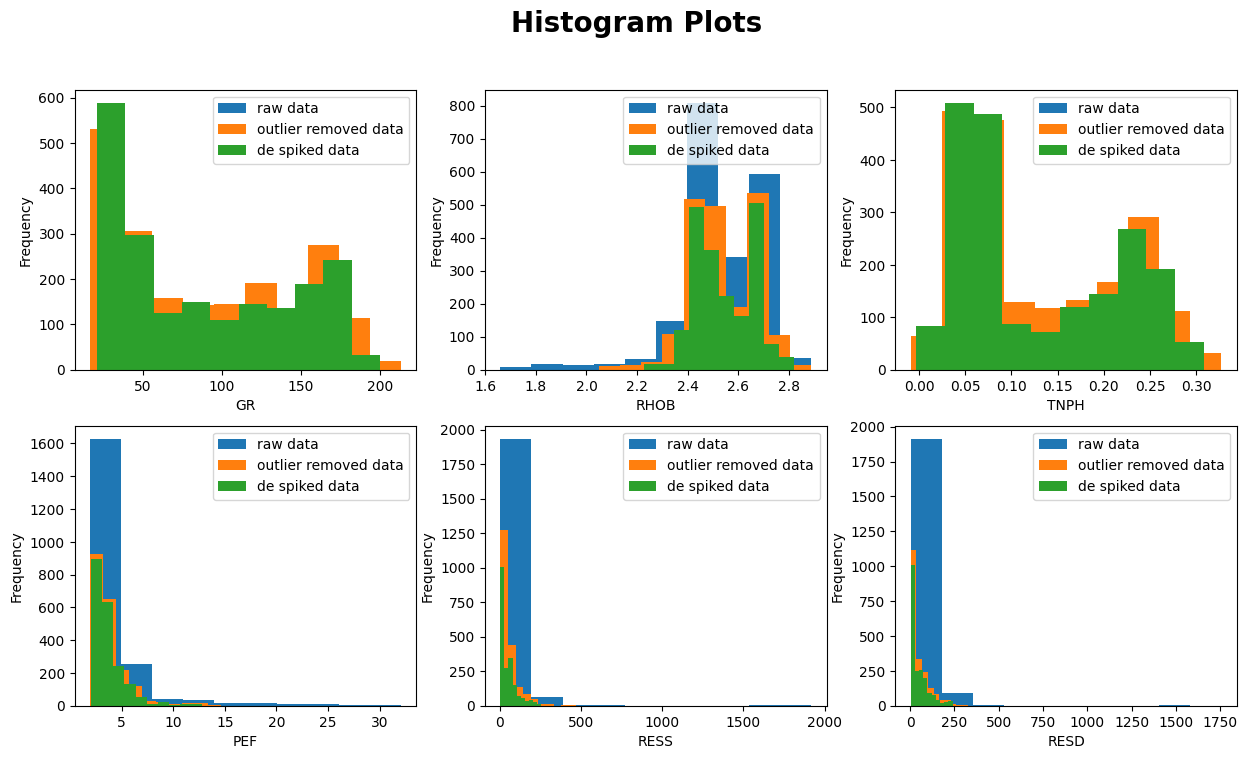

In [ ]:
# assign the figure, axes and their format
fig, ax = plt.subplots(2, 3, figsize = (15, 8))
fig.suptitle('Histogram Plots', fontsize = 20, fontweight = 'bold')

# alotting the histograms of raw data
plot_histogram(ax[0, 0], well_data.GR, xlabel = 'GR', label = 'raw data')
plot_histogram(ax[0, 1], well_data.RHOB, xlabel = 'RHOB', label = 'raw data')
plot_histogram(ax[0, 2], well_data.TNPH, xlabel = 'TNPH', label = 'raw data')
plot_histogram(ax[1, 0], well_data.PEF, xlabel = 'PEF', label = 'raw data')
plot_histogram(ax[1, 1], well_data.RESS, xlabel = 'RESS', label = 'raw data')
plot_histogram(ax[1, 2], well_data.RESD, xlabel = 'RESD', label = 'raw data')

# alotting the histograms of data after outlier removal
plot_histogram(ax[0, 0], outlier_removed_GR, xlabel = 'GR', label = 'outlier removed data')
plot_histogram(ax[0, 1], outlier_removed_RHOB, xlabel = 'RHOB', label = 'outlier removed data')
plot_histogram(ax[0, 2], outlier_removed_TNPH, xlabel = 'TNPH', label = 'outlier removed data')
plot_histogram(ax[1, 0], outlier_removed_PEF, xlabel = 'PEF', label = 'outlier removed data')
plot_histogram(ax[1, 1], outlier_removed_RESS, xlabel = 'RESS', label = 'outlier removed data')
plot_histogram(ax[1, 2], outlier_removed_RESD, xlabel = 'RESD', label = 'outlier removed data')

# alotting the histograms of data after outlier removal
plot_histogram(ax[0, 0], de_spiked_GR, xlabel = 'GR', label = 'de spiked data')
plot_histogram(ax[0, 1], de_spiked_RHOB, xlabel = 'RHOB', label = 'de spiked data')
plot_histogram(ax[0, 2], de_spiked_TNPH, xlabel = 'TNPH', label = 'de spiked data')
plot_histogram(ax[1, 0], de_spiked_PEF, xlabel = 'PEF', label = 'de spiked data')
plot_histogram(ax[1, 1], de_spiked_RESS, xlabel = 'RESS', label = 'de spiked data')
plot_histogram(ax[1, 2], de_spiked_RESD, xlabel = 'RESD', label = 'de spiked data')

##**Density - Neutron Porosity Cross Plot**

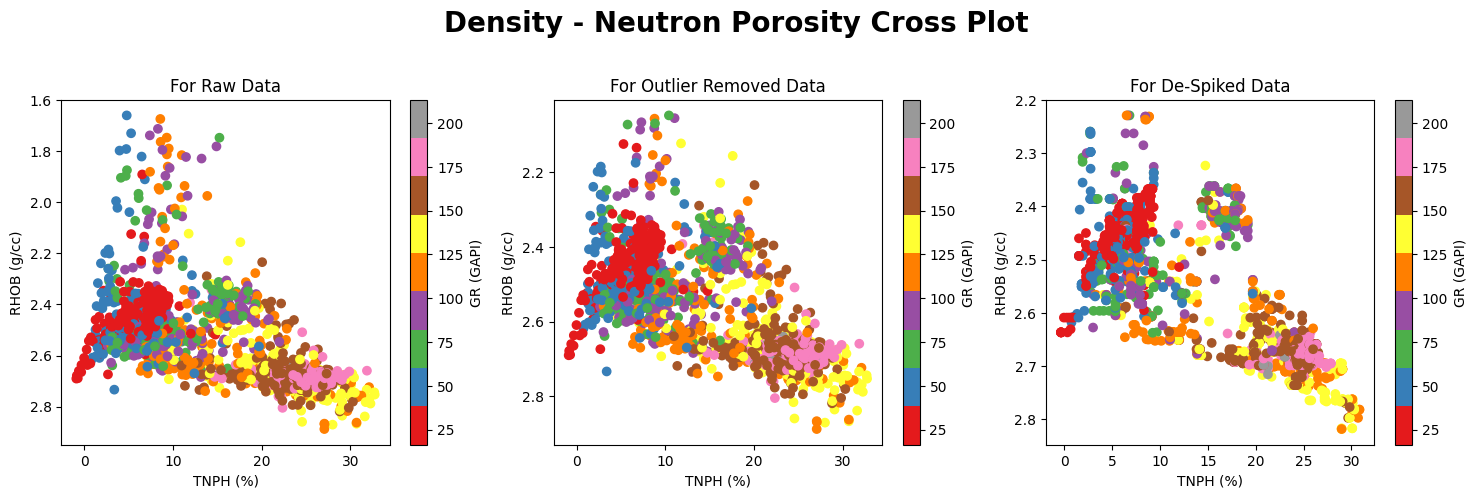

In [ ]:
# density-neutron porosity cross plot
fig, ax = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle('Density - Neutron Porosity Cross Plot', fontsize = 20, fontweight = 'bold')
plt.subplots_adjust(top = 0.8) # adjust space between suptitle and subplots

# alloting the plots
generate_cross_plot(
                    axis = ax[0],
                    x = well_data.TNPH * 100,
                    y = well_data.RHOB,
                    colormap = well_data.GR,
                    xlabel = 'TNPH (%)',
                    ylabel = 'RHOB (g/cc)',
                    title = 'For Raw Data',
                    colormap_label = 'GR (GAPI)',
                    inverted_axis = 'y'
                    )

generate_cross_plot(
                    axis = ax[1],
                    x = outlier_removed_TNPH * 100,
                    y = outlier_removed_RHOB,
                    colormap = well_data.GR,
                    xlabel = 'TNPH (%)',
                    ylabel = 'RHOB (g/cc)',
                    title = 'For Outlier Removed Data',
                    colormap_label = 'GR (GAPI)',
                    inverted_axis = 'y'
                    )

generate_cross_plot(
                    axis = ax[2],
                    x = de_spiked_TNPH * 100,
                    y = de_spiked_RHOB,
                    colormap = well_data.GR,
                    xlabel = 'TNPH (%)',
                    ylabel = 'RHOB (g/cc)',
                    title = 'For De-Spiked Data',
                    colormap_label = 'GR (GAPI)',
                    inverted_axis = 'y'
                    )

plt.show()

##**Bad Borehole Flag**

In [ ]:
# Bad Borehole Flag
caliper = np.array(well_data.CALI)
bitsize = np.array(well_data.BS)
bad_borehole_flag = np.zeros(len(well_data.index))
for i in range(len(well_data.index)):
    if (caliper[i] - bitsize[i]) >= 2.0:
        bad_borehole_flag[i] = 1
    else:
        bad_borehole_flag[i] = 0

##**Raw Data Tracks**

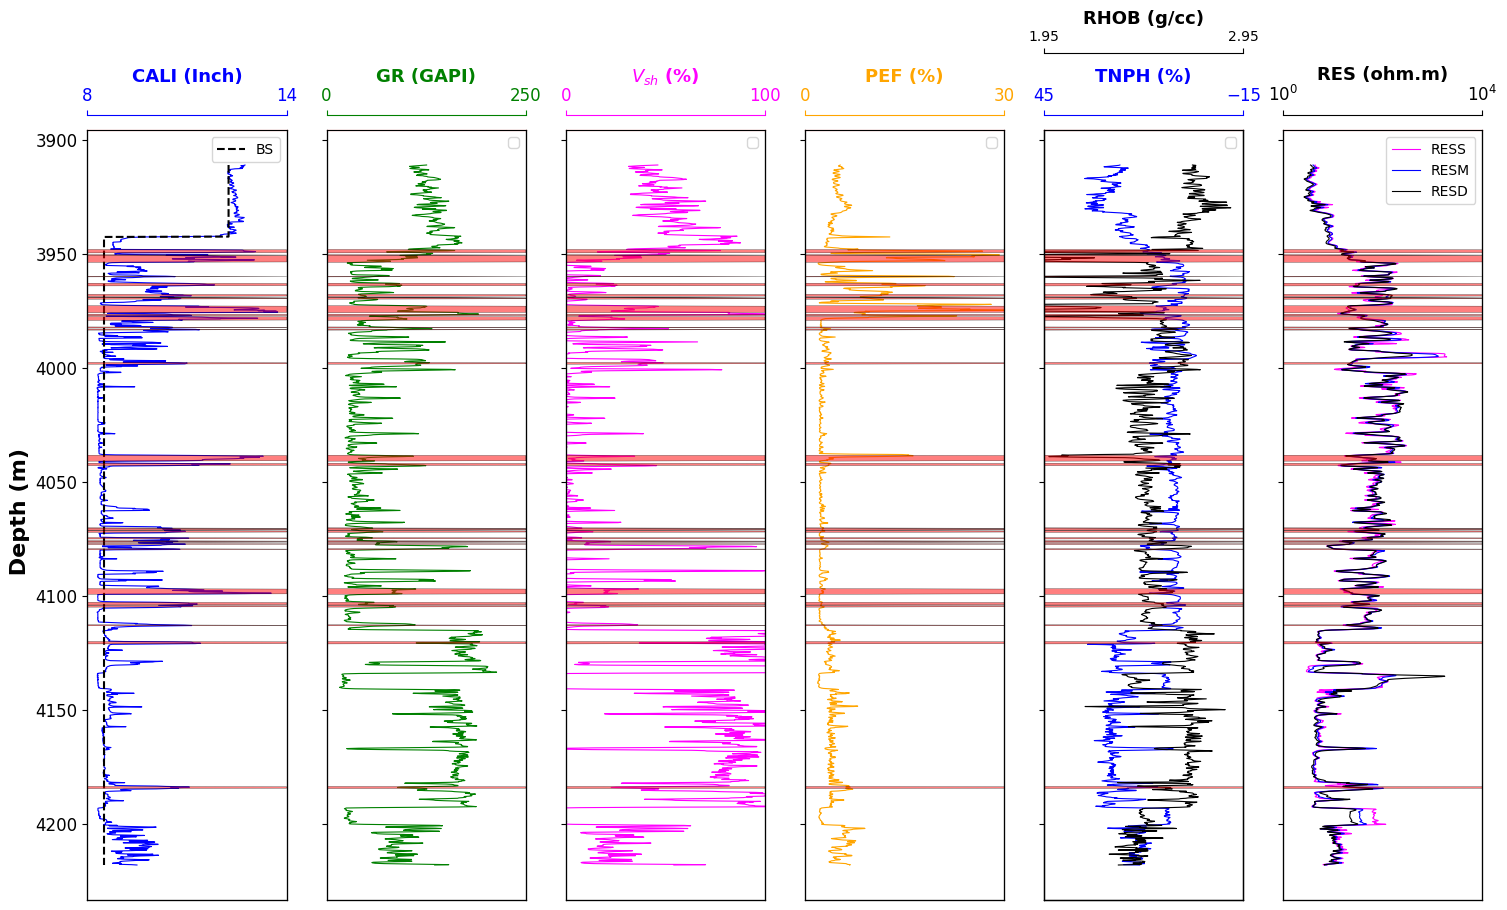

In [ ]:
# volume of shale calculation for raw data
p_5 = well_data['GR'].quantile(0.05)
p_95 = well_data['GR'].quantile(0.95)
I_gr=(well_data['GR'] - p_5) / (p_95 - p_5)
V_sh = 0.33 * (np.power(2, 2 * I_gr) - 1.1) * 100 # using Larionov older age correction

# Define Figure
fig, ax = plt.subplots(1, 6, figsize = (18, 10))
# fig.suptitle('Impact of Outliers in Data Tracks', fontsize = 16, fontweight = 'bold')
# plt.subplots_adjust(top = 0.9)

# Caliper & Bit-Size Log
ax[0].plot(well_data['CALI'], well_data.index, color = 'blue', linewidth = 0.8)
ax[0].plot(well_data['BS'], well_data.index, color = 'black', linestyle = '--', label = 'BS')
ax[0].set_xlim(8, 14)
ax[0].set_xticks([8, 14])
ax[0].set_xlabel('CALI (Inch)', color = 'blue', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'blue')
ax[0].spines.top.set_edgecolor('blue')

# Gamma-Ray Log
ax[1].plot(well_data['GR'], well_data.index, color = 'green', linewidth = 0.8)
# ax[1].axvline(x = p_5, color = '#FFD700', linestyle = '--', label = 'Sand Line')
# ax[1].axvline(x = p_95, color = 'red', linestyle = '--', label = 'Shale Line')
ax[1].set_xlim(0, 250)
ax[1].set_xticks([0, 250])
ax[1].set_xlabel('GR (GAPI)', color = 'green', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'green')
ax[1].spines.top.set_edgecolor('green')

# Volume of Shale Log
ax[2].plot(V_sh, well_data.index, color = 'magenta', linewidth = 0.8)
ax[2].set_xlim(0, 100)
ax[2].set_xticks([0, 100])
ax[2].set_xlabel('$V_{sh}$ (%)', color = 'magenta', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'magenta')
ax[2].spines.top.set_edgecolor('magenta')

# Photoelectric Factor Log
ax[3].plot(well_data['PEF'], well_data.index, color = 'orange', linewidth = 0.8)
ax[3].set_xlim(0, 30)
ax[3].set_xticks([0, 30])
ax[3].set_xlabel('PEF (%)', color = 'orange', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'orange')
ax[3].spines.top.set_edgecolor('orange')

# Neutron Porosity Log
ax[4].plot(well_data['TNPH'] * 100, well_data.index, color = 'blue', linewidth = 0.8)
ax[4].set_xlim(45, -15)
ax[4].set_xticks([45, -15])
ax[4].set_xlabel('TNPH (%)', color = 'blue', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'blue')
ax[4].spines.top.set_edgecolor('blue')

# Formation Density Log (Overlay with Neutron Porosity)
ax4 = ax[4].twiny()
ax4.plot(well_data['RHOB'], well_data.index, color = 'black', linewidth = 0.8)
ax4.set_xlim(1.95, 2.95)
ax4.set_xticks([1.95, 2.95])
ax4.set_xlabel('RHOB (g/cc)', color = 'black', weight = 'bold', size = 13)
ax4.tick_params(axis = 'x', colors = 'black')
ax4.spines.top.set_edgecolor('black')

# Resistivity Log
ax[5].semilogx(well_data['RESS'], well_data.index, color = 'magenta', linewidth = 0.8, label = 'RESS')
ax[5].semilogx(well_data['RESM'], well_data.index, color = 'blue', linewidth = 0.8, label = 'RESM')
ax[5].semilogx(well_data['RESD'], well_data.index, color = 'black', linewidth = 0.8, label = 'RESD')
ax[5].set_xlim(1, 1e4)
ax[5].set_xticks([1, 1e4])
ax[5].set_xlabel('RES (ohm.m)', color = 'black', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# Bad Borehole Zone
for i in range(len(ax)):
  axis = ax[i].twiny()
  axis.plot(bad_borehole_flag, well_data.index, color = 'black', linewidth = 0.2)
  axis.fill_betweenx(well_data.index, 0, bad_borehole_flag, facecolor = 'red', alpha = 0.5)
  axis.set_xlim(0, 1)
  axis.set_xticks([0, 1])
  axis.tick_params(axis = 'x', colors = 'red')
  axis.spines.top.set_edgecolor('red')
  axis.set_xticklabels([])
  axis.set_xticks([])

# Zone Divisions
# for axis in ax:
#   axis.axhline(y = 3948.5, color = 'black', linewidth = 1)
#   axis.axhline(y = 4115, color = 'black', linewidth = 1)
#   axis.axhline(y = 4134, color = 'black', linewidth = 1)
#   axis.axhline(y = 4141, color = 'black', linewidth = 1)
#   axis.axhline(y = 4192.5, color = 'black', linewidth = 1)
#   axis.axhline(y = 4200, color = 'black', linewidth = 1)

# Format the Axes
for axis in ax:
  axis.invert_yaxis()
  axis.legend()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

for axis in [ax4]:
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.1))

plt.show()

##**Outlier Removed Data Tracks**

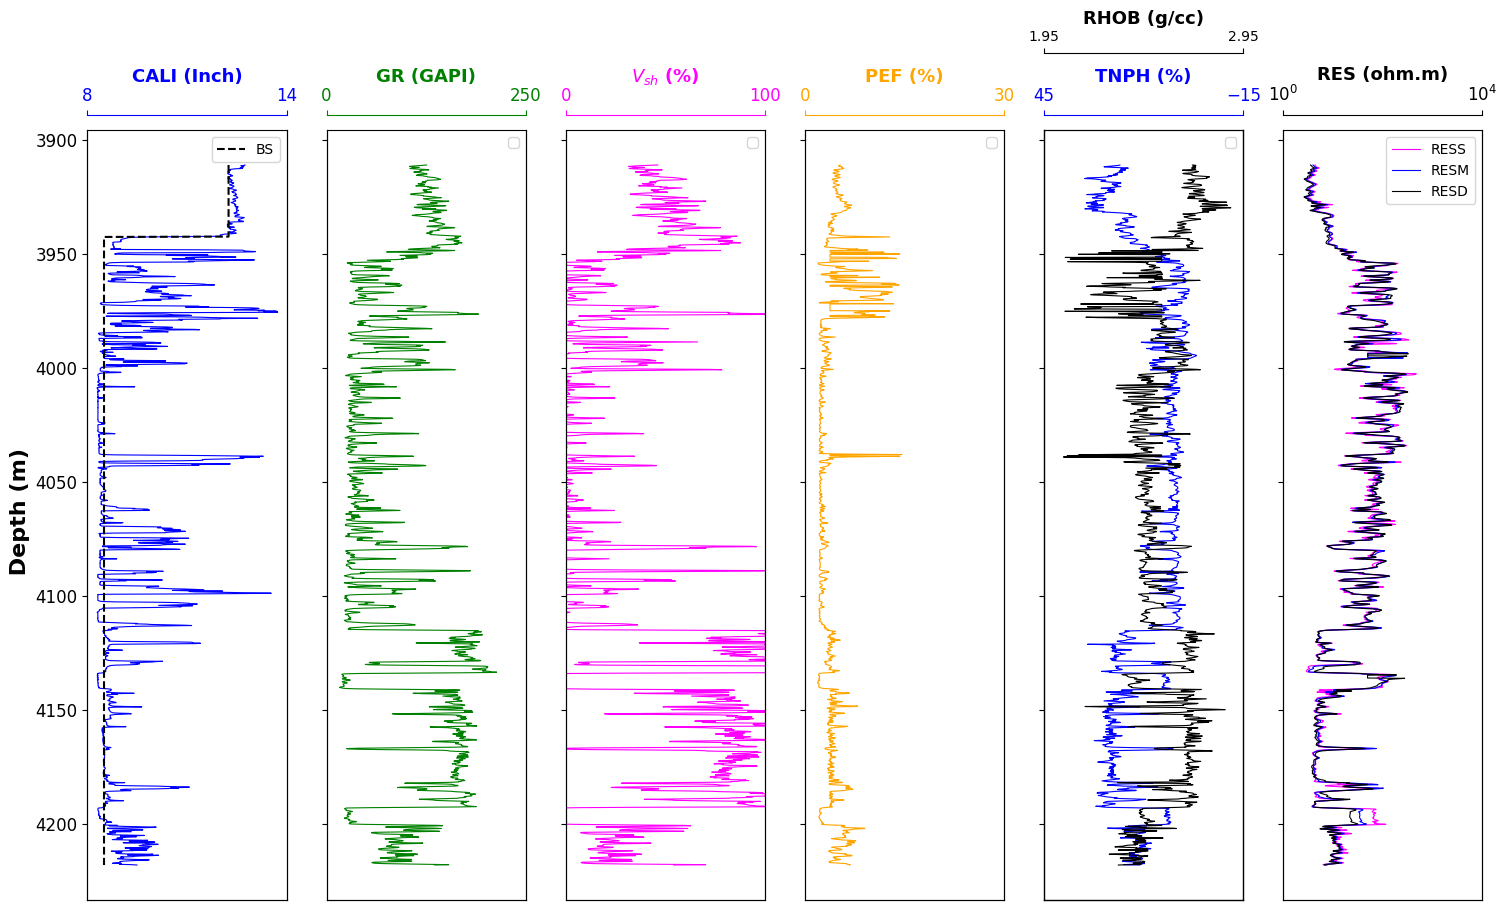

In [ ]:
# volume of shale calculation for raw data
p_5 = outlier_removed_GR.quantile(0.05)
p_95 = outlier_removed_GR.quantile(0.95)
I_gr=(outlier_removed_GR - p_5)/(p_95-p_5)
V_sh = 0.33 * (np.power(2, 2 * I_gr) - 1.1) * 100 # using Larionov older age correction

# Define Figure
fig, ax = plt.subplots(1, 6, figsize = (18, 10))
# fig.suptitle('Outlier Removed Data Tracks', fontsize = 16, fontweight = 'bold')

# Caliper & Bit-Size Log
ax[0].plot(well_data['CALI'], well_data.index, color = 'blue', linewidth = 0.8)
ax[0].plot(well_data['BS'], well_data.index, color = 'black', linestyle = '--', label = 'BS')
ax[0].set_xlim(8, 14)
ax[0].set_xticks([8, 14])
ax[0].set_xlabel('CALI (Inch)', color = 'blue', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'blue')
ax[0].spines.top.set_edgecolor('blue')

# Gamma-Ray Log
ax[1].plot(outlier_removed_GR, well_data.index, color = 'green', linewidth = 0.8)
# ax[1].axvline(x = p_5, color = '#FFD700', linestyle = '--', label = 'Sand Line')
# ax[1].axvline(x = p_95, color = 'red', linestyle = '--', label = 'Shale Line')
ax[1].set_xlim(0, 250)
ax[1].set_xticks([0, 250])
ax[1].set_xlabel('GR (GAPI)', color = 'green', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'green')
ax[1].spines.top.set_edgecolor('green')

# Volume of Shale Log
ax[2].plot(V_sh, well_data.index, color = 'magenta', linewidth = 0.8)
ax[2].set_xlim(0, 100)
ax[2].set_xticks([0, 100])
ax[2].set_xlabel('$V_{sh}$ (%)', color = 'magenta', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'magenta')
ax[2].spines.top.set_edgecolor('magenta')

# Photoelectric Factor Log
ax[3].plot(outlier_removed_PEF, well_data.index, color = 'orange', linewidth = 0.8)
ax[3].set_xlim(0, 30)
ax[3].set_xticks([0, 30])
ax[3].set_xlabel('PEF (%)', color = 'orange', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'orange')
ax[3].spines.top.set_edgecolor('orange')

# Neutron Porosity Log
ax[4].plot(outlier_removed_TNPH * 100, well_data.index, color = 'blue', linewidth = 0.8)
ax[4].set_xlim(45, -15)
ax[4].set_xticks([45, -15])
ax[4].set_xlabel('TNPH (%)', color = 'blue', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'blue')
ax[4].spines.top.set_edgecolor('blue')

# Formation Density Log (Overlay with Neutron Porosity)
ax4 = ax[4].twiny()
ax4.plot(outlier_removed_RHOB, well_data.index, color = 'black', linewidth = 0.8)
ax4.set_xlim(1.95, 2.95)
ax4.set_xticks([1.95, 2.95])
ax4.set_xlabel('RHOB (g/cc)', color = 'black', weight = 'bold', size = 13)
ax4.tick_params(axis = 'x', colors = 'black')
ax4.spines.top.set_edgecolor('black')

# Resistivity Log
ax[5].semilogx(outlier_removed_RESS, well_data.index, color = 'magenta', linewidth = 0.8, label = 'RESS')
ax[5].semilogx(outlier_removed_RESM, well_data.index, color = 'blue', linewidth = 0.8, label = 'RESM')
ax[5].semilogx(outlier_removed_RESD, well_data.index, color = 'black', linewidth = 0.8, label = 'RESD')
ax[5].set_xlim(1, 1e4)
ax[5].set_xticks([1, 1e4])
ax[5].set_xlabel('RES (ohm.m)', color = 'black', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# Zone Divisions
# for axis in ax:
  # axis.axhline(y = 3948.5, color = 'black', linewidth = 1)
  # axis.axhline(y = 4115, color = 'black', linewidth = 1)
  # axis.axhline(y = 4134, color = 'black', linewidth = 1)
  # axis.axhline(y = 4141, color = 'black', linewidth = 1)
  # axis.axhline(y = 4192.5, color = 'black', linewidth = 1)
  # axis.axhline(y = 4200, color = 'black', linewidth = 1)

# Format the Axes
for axis in ax:
  axis.invert_yaxis()
  axis.legend()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

for axis in [ax4]:
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.1))

plt.show()

##**De-Spiked Data Tracks**

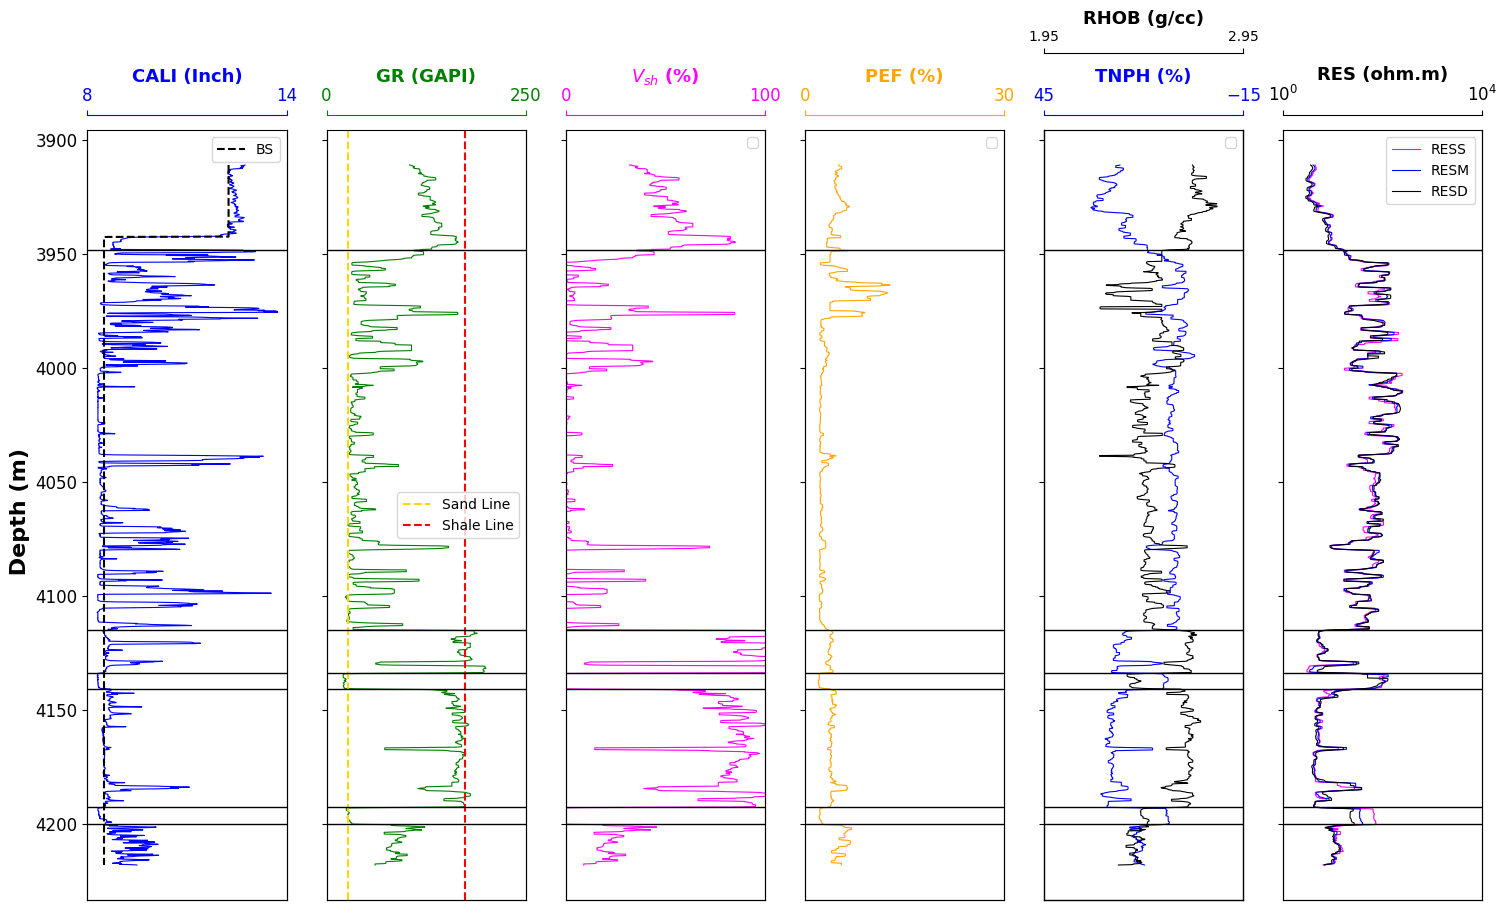

In [ ]:
# volume of shale calculation
p_5 = np.percentile(de_spiked_GR, 5)
p_95 = np.percentile(de_spiked_GR, 95)
I_gr=(de_spiked_GR - p_5)/(p_95-p_5)
V_sh = 0.33 * (np.power(2, 2 * I_gr) - 1.1) * 100 # using Larionov older age correction

# Define Figure
fig, ax = plt.subplots(1, 6, figsize = (18, 10))
# fig.suptitle('De-Spiked Data Tracks', fontsize = 16, fontweight = 'bold')

# Caliper & Bit-Size Log
ax[0].plot(well_data['CALI'], well_data.index, color = 'blue', linewidth = 0.8)
ax[0].plot(well_data['BS'], well_data.index, color = 'black', linestyle = '--', label = 'BS')
ax[0].set_xlim(8, 14)
ax[0].set_xticks([8, 14])
ax[0].set_xlabel('CALI (Inch)', color = 'blue', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'blue')
ax[0].spines.top.set_edgecolor('blue')

# Gamma-Ray Log
ax[1].plot(de_spiked_GR, well_data.index, color = 'green', linewidth = 0.8)
ax[1].axvline(x = p_5, color = '#FFD700', linestyle = '--', label = 'Sand Line')
ax[1].axvline(x = p_95, color = 'red', linestyle = '--', label = 'Shale Line')
ax[1].set_xlim(0, 250)
ax[1].set_xticks([0, 250])
ax[1].set_xlabel('GR (GAPI)', color = 'green', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'green')
ax[1].spines.top.set_edgecolor('green')

# Volume of Shale Log
ax[2].plot(V_sh, well_data.index, color = 'magenta', linewidth = 0.8)
ax[2].set_xlim(0, 100)
ax[2].set_xticks([0, 100])
ax[2].set_xlabel('$V_{sh}$ (%)', color = 'magenta', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'magenta')
ax[2].spines.top.set_edgecolor('magenta')

# Photoelectric Factor Log
ax[3].plot(de_spiked_PEF, well_data.index, color = 'orange', linewidth = 0.8)
ax[3].set_xlim(0, 30)
ax[3].set_xticks([0, 30])
ax[3].set_xlabel('PEF (%)', color = 'orange', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'orange')
ax[3].spines.top.set_edgecolor('orange')

# Neutron Porosity Log
ax[4].plot(de_spiked_TNPH * 100, well_data.index, color = 'blue', linewidth = 0.8)
ax[4].set_xlim(45, -15)
ax[4].set_xticks([45, -15])
ax[4].set_xlabel('TNPH (%)', color = 'blue', weight = 'bold', size = 13)
ax[4].tick_params(axis = 'x', colors = 'blue')
ax[4].spines.top.set_edgecolor('blue')

# Formation Density Log (Overlay with Neutron Porosity)
ax4 = ax[4].twiny()
ax4.plot(de_spiked_RHOB, well_data.index, color = 'black', linewidth = 0.8)
ax4.set_xlim(1.95, 2.95)
ax4.set_xticks([1.95, 2.95])
ax4.set_xlabel('RHOB (g/cc)', color = 'black', weight = 'bold', size = 13)
ax4.tick_params(axis = 'x', colors = 'black')
ax4.spines.top.set_edgecolor('black')

# Resistivity Log
ax[5].semilogx(de_spiked_RESS, well_data.index, color = 'magenta', linewidth = 0.8, label = 'RESS')
ax[5].semilogx(de_spiked_RESM, well_data.index, color = 'blue', linewidth = 0.8, label = 'RESM')
ax[5].semilogx(de_spiked_RESD, well_data.index, color = 'black', linewidth = 0.8, label = 'RESD')
ax[5].set_xlim(1, 1e4)
ax[5].set_xticks([1, 1e4])
ax[5].set_xlabel('RES (ohm.m)', color = 'black', weight = 'bold', size = 13)
ax[5].tick_params(axis = 'x', colors = 'black')
ax[5].spines.top.set_edgecolor('black')

# Zone Divisions
for axis in ax:
  axis.axhline(y = 3948.5, color = 'black', linewidth = 1)
  axis.axhline(y = 4115, color = 'black', linewidth = 1)
  axis.axhline(y = 4134, color = 'black', linewidth = 1)
  axis.axhline(y = 4141, color = 'black', linewidth = 1)
  axis.axhline(y = 4192.5, color = 'black', linewidth = 1)
  axis.axhline(y = 4200, color = 'black', linewidth = 1)

# Format the Axes
for axis in ax:
  axis.invert_yaxis()
  axis.legend()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

for axis in [ax4]:
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.1))

plt.show()

,''''

In [ ]:
# total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 1
b = 1

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2


##**Total Porosity Calibration & Visualization**

In [ ]:
def interpolate_log_at_core_depths(log_depths, log_values, core_depths):
  from scipy.interpolate import interp1d

  # Create an interpolation function
  interp_log = interp1d(log_depths, log_values, kind='linear', fill_value='extrapolate')

  # Interpolate log values at core depths
  log_at_core_depths = interp_log(core_depths)

  return log_at_core_depths


def mean_absolute_error(true_values, predicted_values):

    if len(true_values) != len(predicted_values):
        raise ValueError("Input lists must have the same length.")

    absolute_errors = [abs(true - pred) for true, pred in zip(true_values, predicted_values)]
    mean_absolute_error = sum(absolute_errors) / len(absolute_errors)

    return mean_absolute_error



def mean_square_error(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Input lists must have the same length.")

    # Convert lists to NumPy arrays for easy computation
    array1 = np.array(list1)
    array2 = np.array(list2)

    # Compute mean square error
    mse = np.mean((array1 - array2)**2)

    return mse

In [ ]:
core_porosity = np.array(core_data['Porosity (%)'] / 100)
core_porosity_depths = np.array(core_data['Top depth (m)'])
log_porosity = total_porosity
log_porosity_depths = np.array(well_data.index)
log_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, log_porosity, core_porosity_depths)
print('mean absolute error =', round(mean_absolute_error(core_porosity, log_porosity_at_core_depths), 5))
print('mean square error =', round(mean_square_error(core_porosity, log_porosity_at_core_depths), 5))

mean absolute error = 0.02697
mean square error = 0.00129


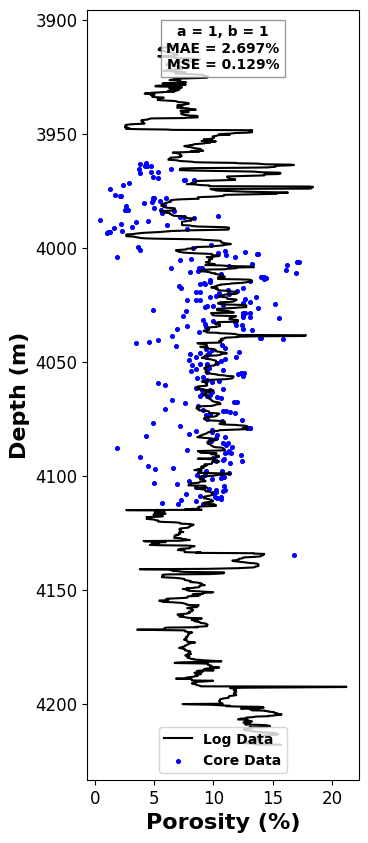

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data', color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = "a = 1, b = 1\nMAE = 2.697%\nMSE = 0.129%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [ ]:
# adjusted total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 1.5
b = 1.5

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2

In [ ]:
core_porosity = np.array(core_data['Porosity (%)'] / 100)
core_porosity_depths = np.array(core_data['Top depth (m)'])
log_porosity = total_porosity
log_porosity_depths = np.array(well_data.index)
log_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, log_porosity, core_porosity_depths)
print('mean absolute error =', round(mean_absolute_error(core_porosity, log_porosity_at_core_depths), 5))
print('mean square error =', round(mean_square_error(core_porosity, log_porosity_at_core_depths), 5))

mean absolute error = 0.02961
mean square error = 0.00161


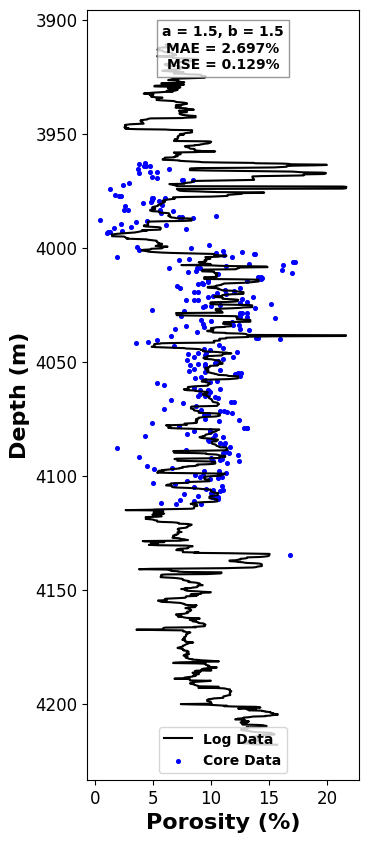

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data', color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = "a = 1.5, b = 1.5\nMAE = 2.697%\nMSE = 0.129%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [ ]:
# adjusted total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 3.5
b = 0.5

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2

In [ ]:
core_porosity = np.array(core_data['Porosity (%)'] / 100)
core_porosity_depths = np.array(core_data['Top depth (m)'])
log_porosity = total_porosity
log_porosity_depths = np.array(well_data.index)
log_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, log_porosity, core_porosity_depths)
print('mean absolute error =', round(mean_absolute_error(core_porosity, log_porosity_at_core_depths), 5))
print('mean square error =', round(mean_square_error(core_porosity, log_porosity_at_core_depths), 5))

mean absolute error = 0.02722
mean square error = 0.00128


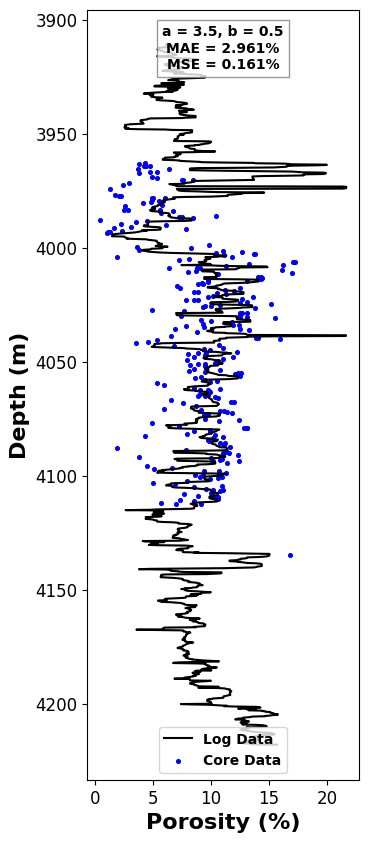

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data', color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = "a = 3.5, b = 0.5\nMAE = 2.961%\nMSE = 0.161%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [ ]:
# adjusted total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 1
b = 4

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2

In [ ]:
core_porosity = np.array(core_data['Porosity (%)'] / 100)
core_porosity_depths = np.array(core_data['Top depth (m)'])
log_porosity = total_porosity
log_porosity_depths = np.array(well_data.index)
log_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, log_porosity, core_porosity_depths)
print('mean absolute error =', round(mean_absolute_error(core_porosity, log_porosity_at_core_depths), 5))
print('mean square error =', round(mean_square_error(core_porosity, log_porosity_at_core_depths), 5))

mean absolute error = 0.02697
mean square error = 0.00129


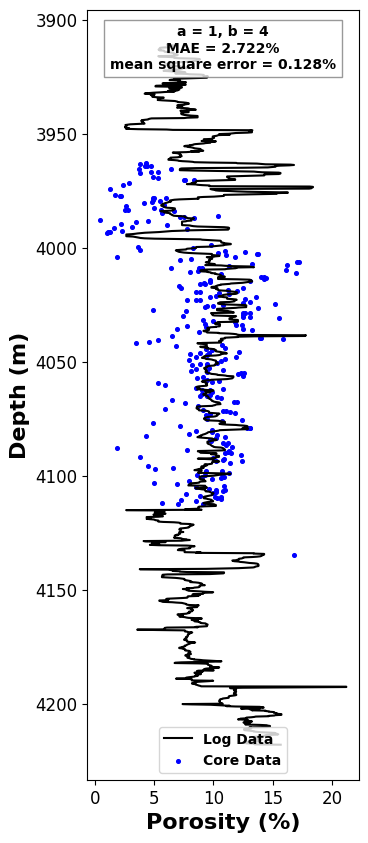

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data',color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = "a = 1, b = 4\nMAE = 2.722%\nmean square error = 0.128%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [ ]:
# adjusted total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 2.5
b = 2.5

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2

In [ ]:
core_porosity = np.array(core_data['Porosity (%)'] / 100)
core_porosity_depths = np.array(core_data['Top depth (m)'])
log_porosity = total_porosity
log_porosity_depths = np.array(well_data.index)
log_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, log_porosity, core_porosity_depths)
print('mean absolute error =', round(mean_absolute_error(core_porosity, log_porosity_at_core_depths), 5))
print('mean square error =', round(mean_square_error(core_porosity, log_porosity_at_core_depths), 5))

mean absolute error = 0.02697
mean square error = 0.00129


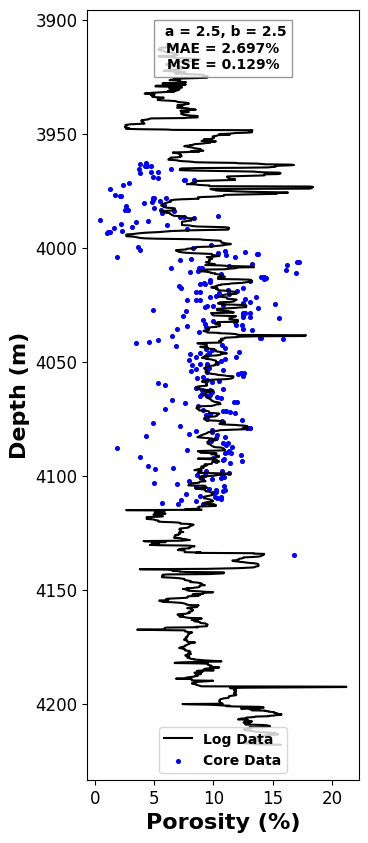

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data', color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = " a = 2.5, b = 2.5\nMAE = 2.697%\nMSE = 0.129%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

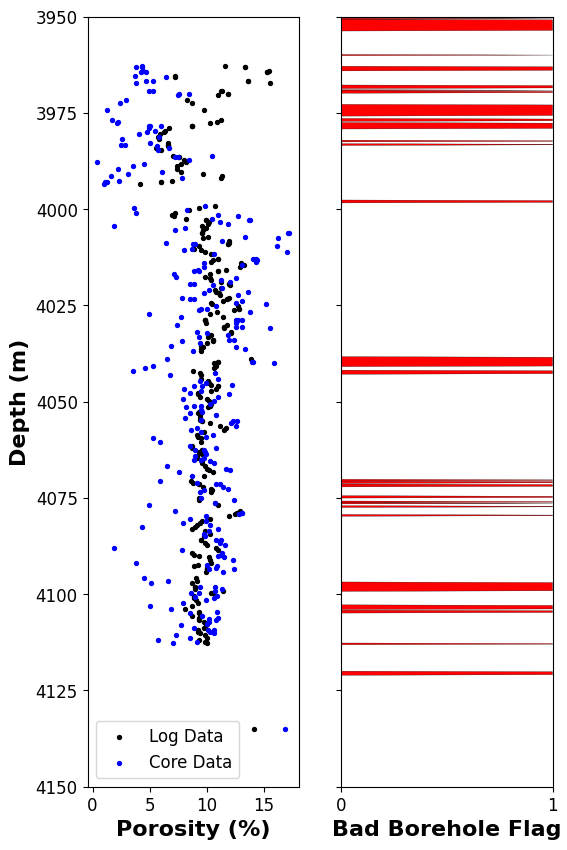

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 10))

ax[0].scatter(log_porosity_at_core_depths * 100, core_data['Top depth (m)'], color = 'black', label = 'Log Data', s = 8)
ax[0].scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 8)
ax[0].set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax[0].legend(fontsize = 12)


ax[1].plot(bad_borehole_flag, well_data.index, color = 'black', linewidth = 0.2)
ax[1].fill_betweenx(well_data.index, 0, bad_borehole_flag, facecolor = 'red')
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1])
ax[1].set_xlabel('Bad Borehole Flag', weight = 'bold', size = 16)


for axis in ax:
  axis.set_ylim([4150, 3950])
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel('Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

In [ ]:
neutron_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, neutron_porosity, core_porosity_depths)
density_porosity_at_core_depths = interpolate_log_at_core_depths(log_porosity_depths, density_porosity, core_porosity_depths)

print(neutron_porosity_at_core_depths.shape)
print(density_porosity_at_core_depths.shape)
print(core_porosity.shape)

(276,)
(276,)
(276,)


In [ ]:
x_data = [density_porosity_at_core_depths, neutron_porosity_at_core_depths]

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return a * x[0] + b * x[1]

def equation(x, y, a, b):
    return a * x + b * y

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = 0.27855774702338437 , b = 0.6271719881617361
mean absolute error = 0.02574
mean square error = 0.00106


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return a * (x[0] ** 2) + b * (x[1] ** 2)

def equation(x, y, a, b):
    return a * (x ** 2) + b * (y ** 2)

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = 2.5397149045322123 , b = 5.554441289606731
mean absolute error = 0.03125
mean square error = 0.00154


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return (a * (x[0] ** 2) + b * (x[1] ** 2)) / 2

def equation(x, y, a, b):
    return (a * (x ** 2) + b * (y ** 2)) / 2

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = 5.07942985296514 , b = 11.108882422211387
mean absolute error = 0.03125
mean square error = 0.00154


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return np.sqrt((a * (x[0] ** 2) + b * (x[1] ** 2)) / 2)

def equation(x, y, a, b):
    return np.sqrt((a * (x ** 2) + b * (y ** 2)) / 2)

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = 0.47885052418374796 , b = 1.0824046233504558
mean absolute error = 0.02637
mean square error = 0.00113


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return (a * (x[0] ** 2) + b * (x[1] ** 2)) / (a + b)

def equation(x, y, a, b):
    return (a * (x ** 2) + b * (y ** 2)) / (a + b)

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = -598.5841974127575 , b = 1698.1133917845962
mean absolute error = 0.0789
mean square error = 0.00734


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define your function
def custom_equation(x, a, b):
    return np.sqrt((a * (x[0] ** 2) + b * (x[1] ** 2)) / (a + b))

def equation(x, y, a, b):
    return np.sqrt((a * (x ** 2) + b * (y ** 2)) / (a + b))

# Generate some example data
# np.random.seed(42)
# x_data = np.random.rand(2, 100)  # 2D array with 100 data points
# a_true, b_true = 2.5, 3.5
# y_data = custom_equation(x_data, a_true, b_true) + 0.2 * np.random.randn(100)

# Fit the data to the custom equation
popt, pcov = curve_fit(custom_equation, x_data, core_porosity)

# Extract the optimized parameters
a_fit, b_fit = popt

# Print the results
# print("True values: a =", a_true, ", b =", b_true)
print("Fitted values: a =", a_fit, ", b =", b_fit)
print('mean absolute error =', round(mean_absolute_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))
print('mean square error =', round(mean_square_error(core_porosity, equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit)), 5))

Fitted values: a = 1.224961748049792 , b = 2.313041261396226
mean absolute error = 0.02699
mean square error = 0.00127


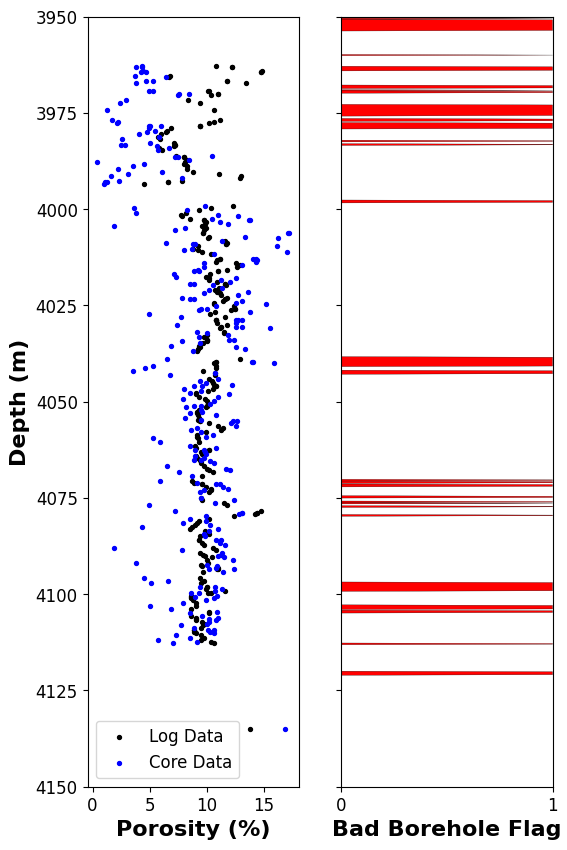

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6, 10))

ax[0].scatter(equation(density_porosity_at_core_depths, neutron_porosity_at_core_depths, a_fit, b_fit) * 100, core_data['Top depth (m)'], color = 'black', label = 'Log Data', s = 8)
ax[0].scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 8)
ax[0].set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax[0].legend(fontsize = 12)


ax[1].plot(bad_borehole_flag, well_data.index, color = 'black', linewidth = 0.2)
ax[1].fill_betweenx(well_data.index, 0, bad_borehole_flag, facecolor = 'red')
ax[1].set_xlim(0, 1)
ax[1].set_xticks([0, 1])
ax[1].set_xlabel('Bad Borehole Flag', weight = 'bold', size = 16)


for axis in ax:
  axis.set_ylim([4150, 3950])
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel('Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

plt.show()

In [ ]:
# total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (neutron_porosity[i] + density_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        # total_porosity[i] = np.sqrt((np.square(neutron_porosity[i]) + np.square(density_porosity[i])) / 2)
        total_porosity[i] = equation(density_porosity[i], neutron_porosity[i], a_fit, b_fit)
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (neutron_porosity[i] + density_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        # total_porosity[i] = np.sqrt((np.square(neutron_porosity[i]) + np.square(density_porosity[i])) / 2)
        total_porosity[i] = equation(density_porosity[i], neutron_porosity[i], a_fit, b_fit)
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (neutron_porosity[i] + density_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        # total_porosity[i] = np.sqrt((np.square(neutron_porosity[i]) + np.square(density_porosity[i])) / 2)
        total_porosity[i] = equation(density_porosity[i], neutron_porosity[i], a_fit, b_fit)

    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (neutron_porosity[i] + density_porosity[i]) / 2

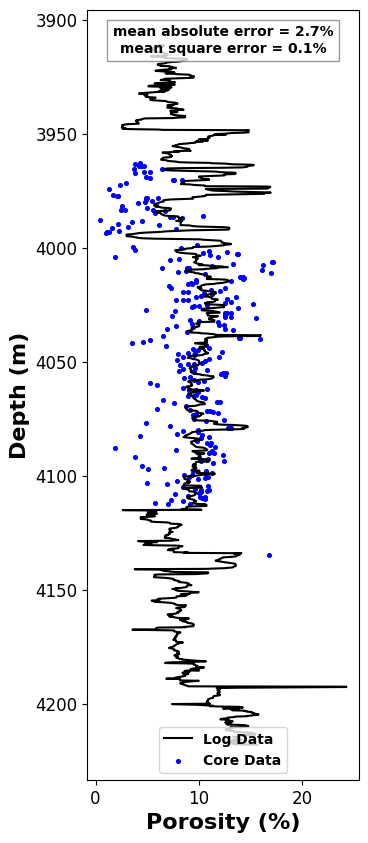

In [ ]:
# setting up the axes
fig, ax = plt.subplots(figsize = (3.5, 10))

# plotting
ax.plot(total_porosity * 100, well_data.index, label = 'Log Data', color = 'black', linewidth = 1.5)
ax.scatter(core_data['Porosity (%)'], core_data['Top depth (m)'], color = 'blue', label = 'Core Data', s = 7)

# Add text to the plot
text_to_add = "mean absolute error = 2.7%\nmean square error = 0.1%"
ax.text(0.5, 0.98, text_to_add, fontweight = 'bold', transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

ax.invert_yaxis()
ax.legend(loc = 'lower center', prop={'weight': 'bold'})
ax.set_xlabel('Porosity (%)', weight = 'bold', size = 16)
ax.set_ylabel('Depth (m)', weight = 'bold', size = 16)
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

plt.show()

In [ ]:
df_shale = well_data.reset_index()
df_shale
df_shale['V_sh'] = V_sh

In [ ]:
np.where(df_shale['V_sh']>90)

(array([1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350,
        1351, 1352, 1353, 1354, 1355, 1356, 1375, 1376, 1377, 1378, 1379,
        1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
        1391, 1392, 1393, 1394, 1411, 1412, 1413, 1414, 1415, 1416, 1417,
        1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1441,
        1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452,
        1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1567, 1568, 1569,
        1570, 1571, 1572, 1573, 1574, 1575, 1587, 1588, 1589, 1590, 1591,
        1592, 1593, 1594, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613,
        1614, 1642, 1643, 1644, 1645, 1648, 1649, 1650, 1651, 1652, 1653,
        1654, 1669, 1670, 1671, 1672, 1673, 1690, 1691, 1692, 1693, 1694,
        1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705,
        1706, 1707, 1708, 1709, 1805, 1806, 1807, 1808, 1809, 1810, 1811,
        1812, 1813, 1814, 1815, 1816, 

In [ ]:
Rsh1 = df_shale.RESD[1347]
Rsh2 = df_shale.RESD[1424]
Rsh3 = df_shale.RESD[1587]
Rsh4 = df_shale.RESD[1701]
Rsh5 = df_shale.RESD[1842]

In [ ]:

Rsh = np.mean([Rsh1,Rsh2,Rsh3,Rsh4,Rsh5])
Rsh

4.68022

In [ ]:
'''Water saturation calculation by Simandoux equation'''
#Sw=a*Rw/2*Phim(((Vsh/Rsh)^^2+4*Phim/a*Rw*Rt)^^0.5-Vsh/Rsh)
dep=well_data.index
gr=de_spiked_GR
lld=de_spiked_RESD
dep_1=np.array(dep)
gr_1=np.array(gr)
lld_1=np.array(lld)
gr_2=[]
a=1
m=2
n=2
Rw=0.1
Vsh=V_sh/100

Sw1 = (0.1/(2*total_porosity**2))*(np.sqrt((Vsh/Rsh)**2 + ((4*total_porosity**2) / (0.1*lld_1)))-(Vsh/Rsh))
Sw1

array([1.98145521, 1.90203399, 1.7854879 , ..., 0.80699747, 0.84242743,
       0.74318996])

In [ ]:
'''Water Saturation calculation by Archies equation '''
a=1
m=2
n=2
Rw=0.1

Sw2=(a*Rw/(lld_1*total_porosity**m))**(1/n)  #Archie's Formula of Water Saturation

Sw2

array([2.7498391 , 2.67495458, 2.47613576, ..., 0.85892081, 0.89401963,
       0.78159223])

<ipython-input-63-3762e9a4d9ff>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


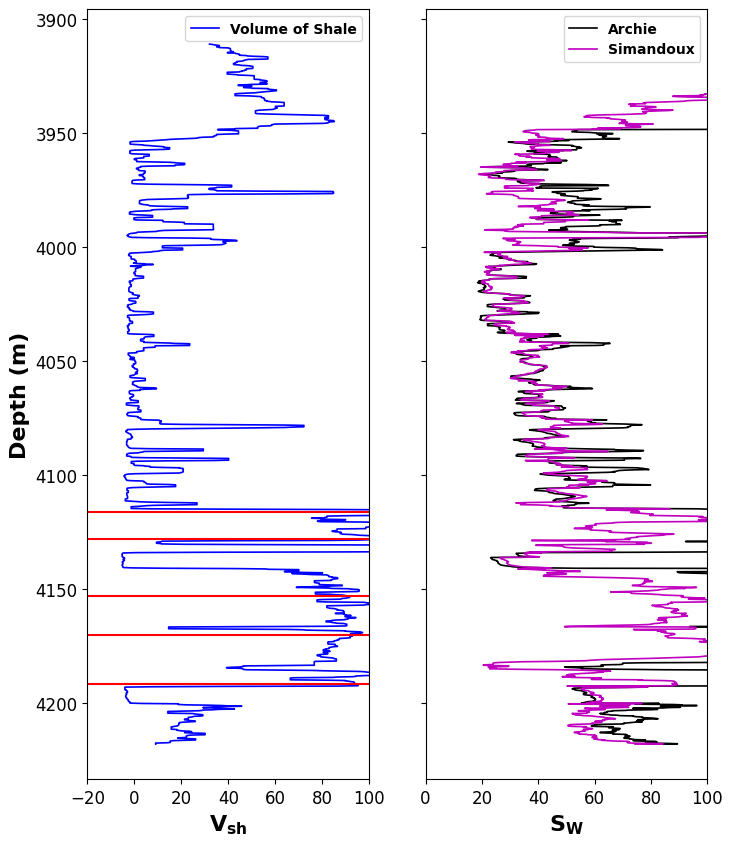

<Figure size 100x200 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(figsize=(8,10))
plt.subplot(122)
plt.plot(np.array(Sw2) * 100,np.array(well_data.index),lw =1.2,color='k',label='Archie')
plt.plot(np.array(Sw1) * 100,np.array(well_data.index),lw =1.2,color='m',label='Simandoux')
# plt.grid()
plt.xlim(0,100)
plt.gca().invert_yaxis()
plt.legend(fontsize = 12, prop={'weight': 'bold'})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.gca().set_yticklabels([])
# plt.yticklabels([])
plt.xlabel('$\mathbf{S_W}$', weight = 'bold', size = 16)
# plt.ylabel('Depth (m)', weight = 'bold', size = 16)

plt.subplot(121)
plt.plot(np.array(Vsh)* 100,np.array(well_data.index),lw =1.2,color='b',label='Volume of Shale')
plt.xlim(-20,100)
plt.axhline(df_shale.DEPTH[1347],linestyle='-',color ='red')
plt.axhline(df_shale.DEPTH[1424],linestyle='-',color ='red')
plt.axhline(df_shale.DEPTH[1587],linestyle='-',color ='red')
plt.axhline(df_shale.DEPTH[1701],linestyle='-',color ='red')
plt.axhline(df_shale.DEPTH[1842],linestyle='-',color ='red')
plt.legend(fontsize = 12, prop={'weight': 'bold'})
# plt.grid()
plt.gca().invert_yaxis()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('$\mathbf{V_{sh}}$', weight = 'bold', size = 16)
plt.ylabel('Depth (m)', weight = 'bold', size = 16)
plt.figure(figsize=(1,2))

plt.show()

In [ ]:
# total porosity calculation
neutron_porosity = de_spiked_TNPH + 0.04 # matrix correction for sandstone
density_porosity = np.zeros(len(well_data.index))
total_porosity = np.zeros(len(well_data.index))
a = 1
b = 1

for i in range(len(well_data.index)):
    if min(well_data.index) < well_data.index[i] <= 3948.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 3948.5 < well_data.index[i] <= 4115:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4115 < well_data.index[i] <= 4134:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4134 < well_data.index[i] <= 4141:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    elif 4141 < well_data.index[i] <= 4192.5:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2
    elif 4192.5 < well_data.index[i] <= 4200:
        rho_ma = 2.65
        rho_fl = 0.8
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = np.sqrt((a * np.square(density_porosity[i]) + b * np.square(neutron_porosity[i])) / (a + b))
    else:
        rho_ma = 2.5
        rho_fl = 1.1
        density_porosity[i] = (rho_ma - de_spiked_RHOB[i]) / (rho_ma - rho_fl)
        total_porosity[i] = (density_porosity[i] + neutron_porosity[i]) / 2


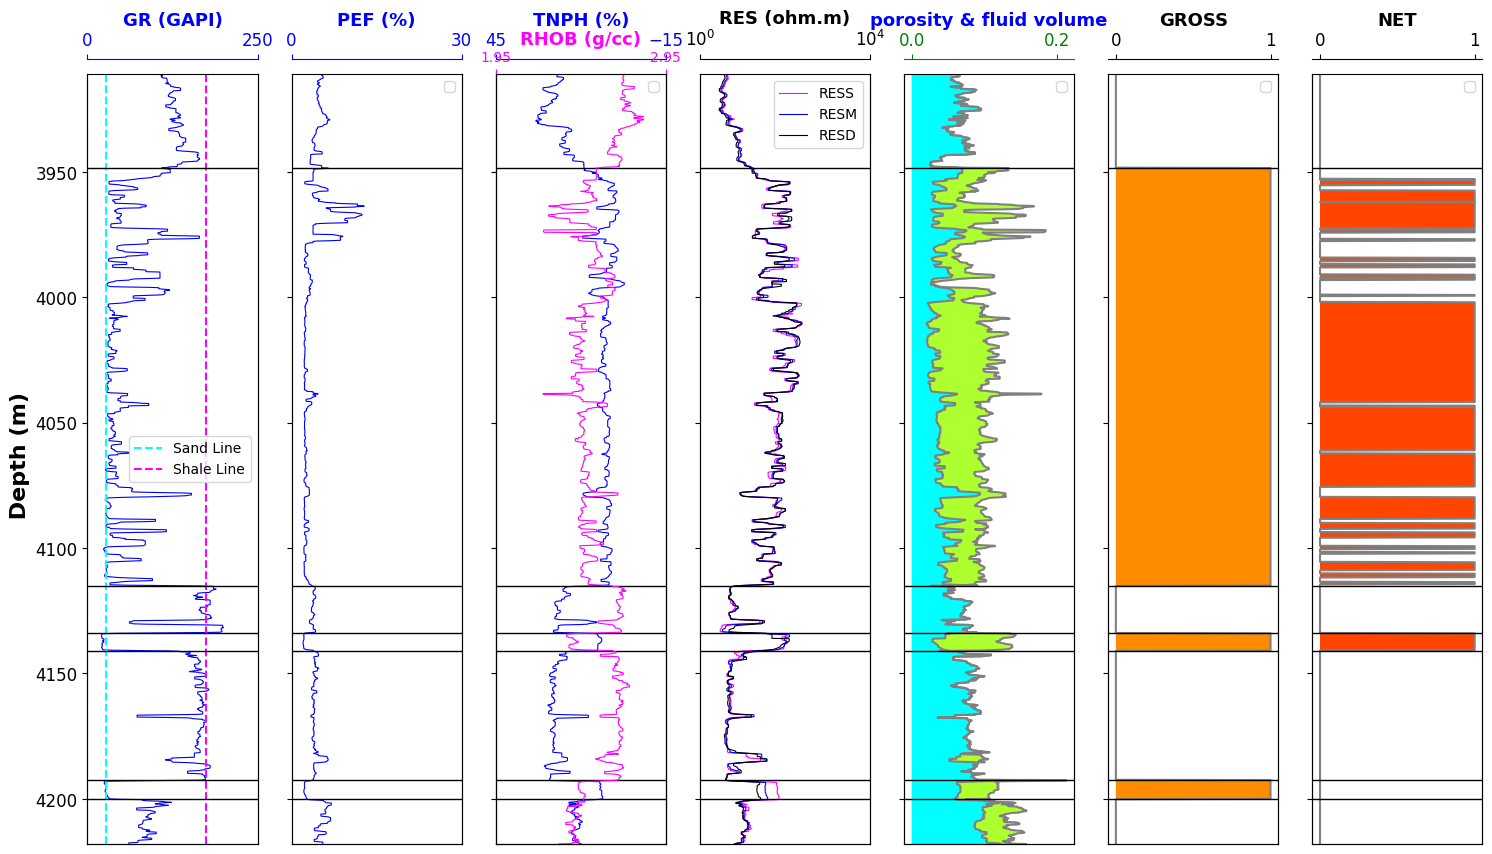

In [ ]:
from statistics import mean
gross=[]
for i in range(len(dep)):
    if  (3948.5 < dep[i] <= 4115) or (4134 < dep[i] <= 4141) or (4192.5 < dep[i] <= 4200):
        gross.append(1)
    else:
        gross.append(0)
gross
net=[]

for i in range(len(dep)):
    if   gross[i]==1 and (Vsh[i]<=0.5) and (total_porosity[i]>=0.05) and (Sw2[i]<=0.5):
        net.append(1)
    else:
        net.append(0)
sw=[]
for i in range (len(dep)):
    if Sw2[i]>=1:
      sw.append(1)
    else:
      sw.append(Sw2[i])

# fig,ax=plt.subplots(figsize=(8,10))
# plt.subplot(122)
# plt.plot(gross,dep)
# plt.plot(net,dep)

# # volume of shale calculation
# p_5 = np.percentile(de_spiked_GR, 5)
# p_95 = np.percentile(de_spiked_GR, 95)
# I_gr=(de_spiked_GR - p_5)/(p_95-p_5)
# V_sh = 0.33 * (np.power(2, 2 * I_gr) - 1.1) * 100 # using Larionov older age correction

# # Define Figure
# fig, ax = plt.subplots(1, 6, figsize = (18, 10))
# # fig.suptitle('De-Spiked Data Tracks', fontsize = 16, fontweight = 'bold')

# # Caliper & Bit-Size Log
# ax[0].plot(well_data['CALI'], well_data.index, color = 'blue', linewidth = 0.8)
# ax[0].plot(well_data['BS'], well_data.index, color = 'black', linestyle = '--', label = 'BS')
# ax[0].set_xlim(8, 14)
# ax[0].set_xticks([8, 14])
# ax[0].set_xlabel('CALI (Inch)', color = 'blue', weight = 'bold', size = 13)
# ax[0].tick_params(axis = 'x', colors = 'blue')
# ax[0].spines.top.set_edgecolor('blue')

fig, ax = plt.subplots(1, 7, figsize = (18, 10))

ax[4].plot(total_porosity,well_data.index,color='gray')
ax[4].set_xlabel('porosity & fluid volume', color = 'blue', weight = 'bold', size = 13)
ax[4].fill_betweenx(dep,0,total_porosity,facecolor='greenyellow')
ax[4].plot(sw*total_porosity,well_data.index,color='gray')
ax[4].fill_betweenx(dep,0,sw*total_porosity,facecolor='cyan')
# ax[4].set_xlabel('water saturation', color = 'blue', weight = 'bold', size = 13)
ax[4].set_ylim(dep.min(),dep.max())
ax[4].tick_params(axis = 'x', colors = 'black')
ax[4].spines.top.set_edgecolor('green')
ax[4].set_xticks([0,0.2])
ax[4].tick_params(axis = 'x', colors = 'green')

ax[5].plot(gross,well_data.index,color='gray')
ax[5].set_ylim(dep.min(),dep.max())
ax[5].set_xlabel('GROSS', color = 'k', weight = 'bold', size = 13)
ax[5].set_xticks([0,1])
ax[5].fill_betweenx(dep,0,gross,facecolor='darkorange')
# ax[5].set_xlim(0,1)
ax[5].tick_params(axis = 'x', colors = 'black')
# ax[5].fill_betweenx(gross,well_data.index,0,color='blue')
# ax[5].axhline(dep.min(),0,1,lw=5,ls='-')
ax[6].plot(net,well_data.index,color='gray')
ax[6].set_ylim(dep.min(),dep.max())
ax[6].set_xlabel('NET', color = 'k', weight = 'bold', size = 13)
ax[6].set_xticks([0,1])
ax[6].tick_params(axis = 'x', colors = 'k')
ax[6].fill_betweenx(dep,0,net,facecolor='orangered')
# Gamma-Ray Log
ax[0].plot(de_spiked_GR, well_data.index, color = 'blue', linewidth = 0.8)
ax[0].axvline(x = p_5, color = 'cyan', linestyle = '--', label = 'Sand Line')
ax[0].axvline(x = p_95, color = 'magenta', linestyle = '--', label = 'Shale Line')
ax[0].set_xlim(0, 250)
ax[0].set_ylim(dep.min(),dep.max())
ax[0].set_xticks([0, 250])
ax[0].set_xlabel('GR (GAPI)', color = 'blue', weight = 'bold', size = 13)
ax[0].tick_params(axis = 'x', colors = 'blue')
ax[0].spines.top.set_edgecolor('blue')

# # Volume of Shale Log
# ax[2].plot(V_sh, well_data.index, color = 'magenta', linewidth = 0.8)
# ax[2].set_xlim(0, 100)
# ax[2].set_xticks([0, 100])
# ax[2].set_xlabel('$V_{sh}$ (%)', color = 'magenta', weight = 'bold', size = 13)
# ax[2].tick_params(axis = 'x', colors = 'magenta')
# ax[2].spines.top.set_edgecolor('magenta')

# Photoelectric Factor Log
ax[1].plot(de_spiked_PEF, well_data.index, color = 'b', linewidth = 0.8)
ax[1].set_xlim(0, 30)
ax[1].set_xticks([0, 30])
ax[1].set_xlabel('PEF (%)', color = 'b', weight = 'bold', size = 13)
ax[1].tick_params(axis = 'x', colors = 'b')
ax[1].spines.top.set_edgecolor('b')
ax[1].set_ylim(dep.min(),dep.max())

# Neutron Porosity Log
ax[2].plot(de_spiked_TNPH * 100, well_data.index, color = 'blue', linewidth = 0.8)
ax[2].set_xlim(45, -15)
ax[2].set_xticks([45, -15])
ax[2].set_xlabel('TNPH (%)', color = 'blue', weight = 'bold', size = 13)
ax[2].tick_params(axis = 'x', colors = 'blue')
ax[2].spines.top.set_edgecolor('blue')
ax[2].set_ylim(dep.min(),dep.max())

# Formation Density Log (Overlay with Neutron Porosity)
ax2 = ax[2].twiny()
ax2.plot(de_spiked_RHOB, well_data.index, color = 'magenta', linewidth = 0.8)
ax2.set_xlim(1.95, 2.95)
ax2.set_ylim(dep.min(),dep.max())
ax2.set_xticks([1.95, 2.95])
ax2.set_xlabel('RHOB (g/cc)', color = 'magenta', weight = 'bold', size = 13)
ax2.tick_params(axis = 'x', colors = 'magenta')
ax2.spines.top.set_edgecolor('magenta')

# Resistivity Log
ax[3].semilogx(de_spiked_RESS, well_data.index, color = 'magenta', linewidth = 0.8, label = 'RESS')
ax[3].semilogx(de_spiked_RESM, well_data.index, color = 'blue', linewidth = 0.8, label = 'RESM')
ax[3].semilogx(de_spiked_RESD, well_data.index, color = 'black', linewidth = 0.8, label = 'RESD')
ax[3].set_xlim(1, 1e4)
ax[3].set_xticks([1, 1e4])
ax[3].set_xlabel('RES (ohm.m)', color = 'black', weight = 'bold', size = 13)
ax[3].tick_params(axis = 'x', colors = 'black')
ax[3].spines.top.set_edgecolor('black')
ax[3].set_ylim(dep.min(),dep.max())
# Zone Divisions
for axis in ax:
  axis.axhline(y = 3948.5, color = 'black', linewidth = 1)
  axis.axhline(y = 4115, color = 'black', linewidth = 1)
  axis.axhline(y = 4134, color = 'black', linewidth = 1)
  axis.axhline(y = 4141, color = 'black', linewidth = 1)
  axis.axhline(y = 4192.5, color = 'black', linewidth = 1)
  axis.axhline(y = 4200, color = 'black', linewidth = 1)

# Format the Axes
for axis in ax:
  axis.invert_yaxis()
  axis.legend()
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.02))
  axis.tick_params(axis = 'x', labelsize = 12)
  axis.tick_params(axis = 'y', labelsize = 12)
  if axis == ax[0]:
    axis.set_ylabel(' Depth (m)', weight = 'bold', size = 16)
  else:
    axis.set_yticklabels([])

for axis in [ax4]:
  axis.twiny().xaxis.set_visible(False)
  axis.xaxis.set_ticks_position('top')
  axis.xaxis.set_label_position('top')
  axis.spines.top.set_position(('axes', 1.1))

plt.show()
